In [2]:
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

In [3]:
url_class = "/Users/karmanjotsingh/OneDrive - University of Windsor/Four datasets/Prostate Cancer Dataset/prad_tcga_clinical_data.xlsx"
url_features = "/Users/karmanjotsingh/OneDrive - University of Windsor/Four datasets/Prostate Cancer Dataset/prad_tcga_genes.xlsx"
dataset=pd.read_excel(url_features)


In [4]:
dataset2=pd.read_excel(url_class)

In [5]:
dataset.head()

,ID,TCGA-2A-A8VO,TCGA-2A-A8VT,TCGA-2A-A8VV,TCGA-2A-A8VX,TCGA-2A-A8W1,TCGA-2A-A8W3,TCGA-2A-AAYF,TCGA-2A-AAYO,TCGA-2A-AAYU,...,TCGA-ZG-A9LN,TCGA-ZG-A9LS,TCGA-ZG-A9LU,TCGA-ZG-A9LY,TCGA-ZG-A9LZ,TCGA-ZG-A9M4,TCGA-ZG-A9MC,TCGA-ZG-A9N3,TCGA-ZG-A9ND,TCGA-ZG-A9NI
0,ENSG00000242268.2,0.000000,0.027121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028595,...,0.029481,0.000000,0.000000,0.000000,0.024259,0.000000,0.000000,0.000000,0.000000,0.000000
1,ENSG00000270112.3,0.011071,0.007526,0.000000,0.016101,0.000000,0.011015,0.000000,0.008723,0.000000,...,0.000000,0.000000,0.008069,0.000000,0.003366,0.007774,0.009559,0.000000,0.000000,0.000000
2,ENSG00000167578.15,3.906517,2.621620,2.502227,5.116545,1.928498,1.756132,2.653920,3.412439,2.645427,...,5.353882,2.905381,3.838241,1.648086,1.854955,2.980603,2.975541,2.650948,3.121445,1.699858
3,ENSG00000273842.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000078237.5,1.780208,0.885415,1.007380,1.001573,1.931438,1.479154,1.768938,1.742239,1.779720,...,2.887371,2.115951,1.734531,2.538387,2.797540,1.085584,4.263520,4.084599,2.844586,1.846588


In [6]:
data = dataset [~( dataset.loc[:,dataset.columns!='ID'] == 0).all(axis=1) ]

In [7]:
data.shape

(57465, 495)

In [8]:
X=np.transpose(data)


In [9]:
y=dataset2['LATERALITY']

In [10]:
X.shape

(495, 57465)

In [11]:
from imblearn.over_sampling import SMOTE

In [13]:
from collections import Counter

In [14]:
Counter(y)


Counter({'Bilateral': 430, 'Right': 38, 'Left': 18, '[Not Available]': 8})

In [15]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X.iloc[1:,1:], y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'Bilateral': 430, 'Right': 430, 'Left': 430, '[Not Available]': 430})


In [16]:
from imblearn.over_sampling import RandomOverSampler

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [141]:
clf = RandomForestClassifier(n_estimators=1)
clf = clf.fit(X.iloc[1:,1:], y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X.iloc[1:,1:])
X_new.shape              

(494, 35)

In [142]:
feat_labels=X.iloc[0]

In [143]:
# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    if(feature[1]!=0):
        print(feature)

('ENSG00000202290.1', 0.011511931394481733)
('ENSG00000226086.5', 0.04093038567132092)
('ENSG00000241640.2', 0.043354188581422475)
('ENSG00000105697.6', 0.029515857113211252)
('ENSG00000126264.8', 0.0442419324180082)
('ENSG00000204278.11', 0.01476982549827059)
('ENSG00000223698.3', 0.0286103295227699)
('ENSG00000262521.1', 0.040674034642362425)
('ENSG00000265984.1', 0.015024936174954385)
('ENSG00000159346.11', 0.014945439158155749)
('ENSG00000252021.1', 0.030698483718617952)
('ENSG00000264999.1', 0.07438478747203578)
('ENSG00000228028.2', 0.04662332214765101)
('ENSG00000238268.2', 0.014693692377145316)
('ENSG00000277975.1', 0.014828292725797687)
('ENSG00000128050.7', 0.0037961596823624898)
('ENSG00000124508.15', 0.013814317673378082)
('ENSG00000114779.18', 0.014712985822307878)
('ENSG00000183918.13', 0.015028568680902186)
('ENSG00000278351.1', 0.011511931394481733)
('ENSG00000230735.1', 0.015226229627235794)
('ENSG00000260041.4', 0.05710504984869161)
('ENSG00000188549.11', 0.0152268856

In [621]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_new, y)
print('Resampled dataset shape %s' % Counter(y_res))
#X_res.shape
#y_res.shape

Resampled dataset shape Counter({'Bilateral': 430, 'Right': 430, 'Left': 430, '[Not Available]': 430})


In [534]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

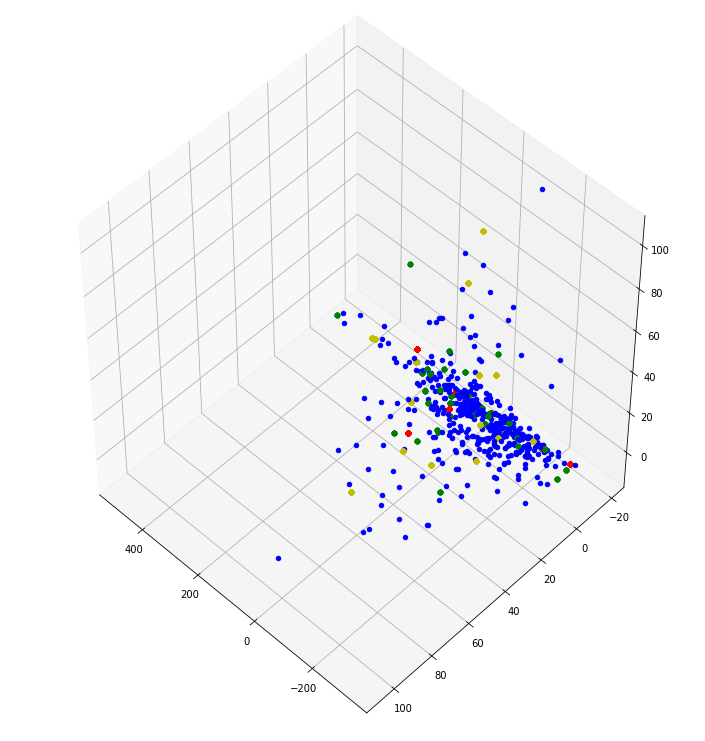

In [556]:
fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X_res)
X_pca = pca.transform(X_res)

for i in range(len(y_res)):
    if y_res[i]=='Left':
        ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='y')
    elif y_res[i]=='Right':
        ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='g')
    elif y_res[i]=='Bilateral':
        ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='b')
    else :
        ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='r')
plt.show()

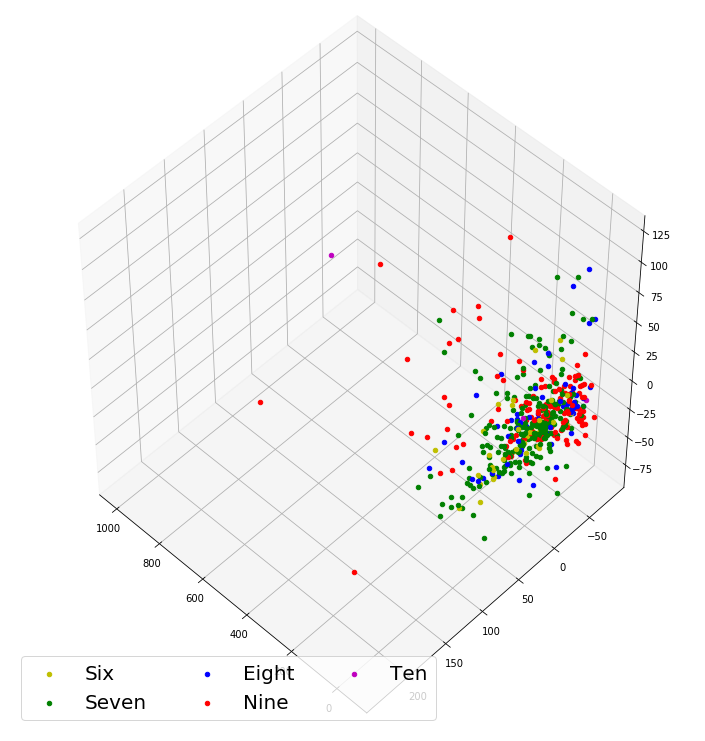

In [591]:
fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X_new_gleason)
X_pca = pca.transform(X_new_gleason)

for i in range(len(y_gleason)):
    if y_gleason[i]==6:
        six=ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2], c='y',label=y_gleason[i])
    elif y_gleason[i]==7:
        seven=ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2], c='g',label=y_gleason[i])
    elif y_gleason[i]==8:
        eight=ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2], c='b',label=y_gleason[i])
    elif y_gleason[i]==9:
        nine=ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2], c='r',label=y_gleason[i])
    elif y_gleason[i]==10:
        ten=ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2], c='m',label=y_gleason[i])
plt.legend((six,seven,eight,nine,ten),
           ('Six', 'Seven', 'Eight','Nine','Ten'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=20)
plt.show()

In [558]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import ClusterCentroids

In [607]:
cc = ClusterCentroids(random_state=42)
X_res_under, y_res_under = cc.fit_resample(X_new, y)
print('Resampled dataset shape %s' % Counter(y_res_under))

Resampled dataset shape Counter({'Bilateral': 8, 'Left': 8, 'Right': 8, '[Not Available]': 8})


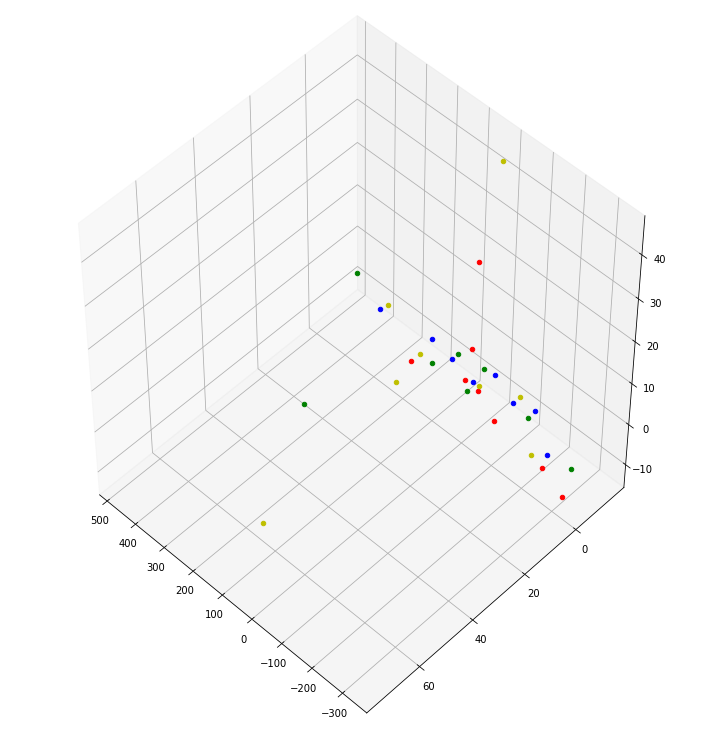

In [560]:
fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X_res_under)
X_pca = pca.transform(X_res_under)

for i in range(len(y_res_under)):
    if y_res_under[i]=='Left':
        ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='y')
    elif y_res_under[i]=='Right':
        ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='g')
    elif y_res_under[i]=='Bilateral':
        ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='b')
    else :
        ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='r')
plt.show()

In [562]:
model = svm.SVC(kernel='rbf',gamma='auto')
scores=cross_val_score(model, X_res_under, y_res_under, scoring='accuracy', cv=2)
print("Accuracy scores for each fold are :" , scores)
print("Mean Accuracy score :" , scores.mean())

Accuracy scores for each fold are : [0.0625 0.0625]
Mean Accuracy score : 0.0625


In [592]:
y_gleason=dataset2['GLEASON_SCORE']

In [593]:
clf = RandomForestClassifier(n_estimators=1)
clf = clf.fit(X.iloc[1:,1:], y_gleason)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new_gleason = model.transform(X.iloc[1:,1:])
X_new_gleason.shape

(494, 69)

In [565]:
cc = ClusterCentroids(random_state=42)
X_res_under_g, y_res_under_g = cc.fit_resample(X_new_gleason, y_gleason)
print('Resampled dataset shape %s' % Counter(y_res_under_g))

Resampled dataset shape Counter({6: 4, 7: 4, 8: 4, 9: 4, 10: 4})


In [566]:
model = svm.SVC(kernel='rbf',gamma='auto')
scores=cross_val_score(model, X_res_under_g, y_res_under_g, scoring='accuracy', cv=2)
print("Accuracy scores for each fold are :" , scores)
print("Mean Accuracy score :" , scores.mean())

Accuracy scores for each fold are : [0.  0.1]
Mean Accuracy score : 0.05


In [567]:
ros = RandomOverSampler(random_state=42)
X_res_over_g, y_res_over_g = ros.fit_resample(X_new_gleason, y_gleason)
print('Resampled dataset shape %s' % Counter(y_res_over_g))
#X_res.shape
#y_res.shape

Resampled dataset shape Counter({6: 246, 9: 246, 8: 246, 7: 246, 10: 246})


In [569]:
model = svm.SVC(kernel='rbf',gamma='auto')
scores=cross_val_score(model, X_res_over_g, y_res_over_g, scoring='accuracy', cv=10)
print("Accuracy scores for each fold are :" , scores)
print("Mean Accuracy score :" , scores.mean())

Accuracy scores for each fold are : [0.896 0.896 0.912 0.896 0.92  0.944 1.    1.    1.    1.   ]
Mean Accuracy score : 0.9464


In [95]:
sm = SMOTE(random_state=42)
X_res_smote, y_res_smote = sm.fit_resample(X_new, y)
print('Resampled dataset shape %s' % Counter(y_res_smote))

Resampled dataset shape Counter({'Bilateral': 430, 'Right': 430, 'Left': 430, '[Not Available]': 430})


In [96]:
model = svm.SVC(kernel='rbf',gamma='auto')
scores=cross_val_score(model, X_res_smote, y_res_smote, scoring='accuracy', cv=10)
print("Accuracy scores for each fold are :" , scores)
print("Mean Accuracy score :" , scores.mean())

Accuracy scores for each fold are : [0.86046512 0.83139535 0.86046512 0.88953488 0.85465116 0.84302326
 0.76744186 0.8255814  0.88372093 0.80232558]
Mean Accuracy score : 0.8418604651162791


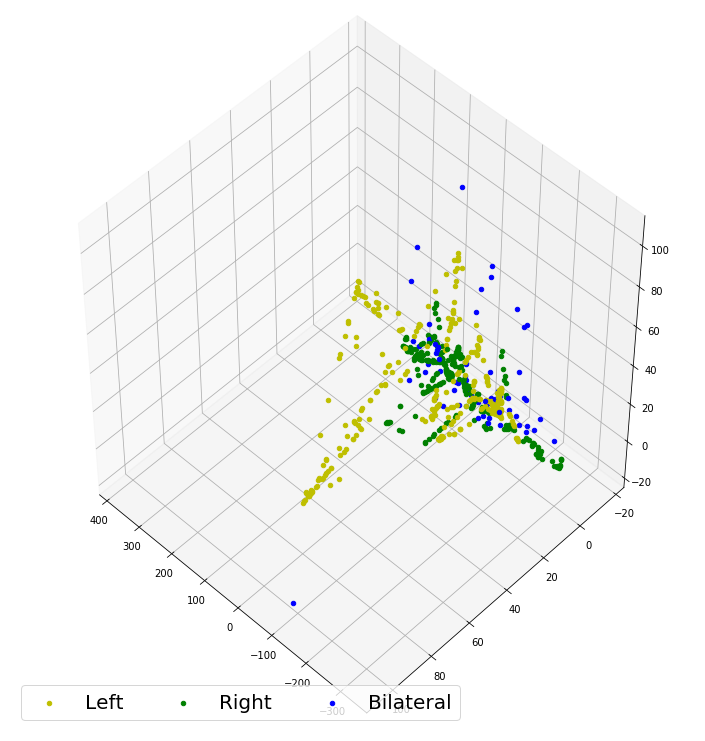

In [611]:
fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X_res_smoteenn)
X_pca = pca.transform(X_res_smoteenn)

for i in range(len(y_res_smoteenn)):
    if y_res_smoteenn[i]=='Left':
        left=ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='y')
    elif y_res_smoteenn[i]=='Right':
        right=ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='g')
    elif y_res_smoteenn[i]=='Bilateral':
        bilateral=ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='b')
plt.legend((left,right,bilateral),
           ('Left', 'Right', 'Bilateral'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=20)
plt.show()

In [573]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTEENN

In [609]:
sme = SMOTEENN(random_state=42)
X_res_smoteenn, y_res_smoteenn = sme.fit_resample(X_new, y)
print('Resampled dataset shape %s' % Counter(y_res_smoteenn))

Resampled dataset shape Counter({'Left': 347, 'Right': 331, '[Not Available]': 323, 'Bilateral': 62})


In [575]:
model = svm.SVC(kernel='rbf',gamma='auto')
scores=cross_val_score(model, X_res_smoteenn, y_res_smoteenn, scoring='accuracy', cv=10)
print("Accuracy scores for each fold are :" , scores)
print("Mean Accuracy score :" , scores.mean())

Accuracy scores for each fold are : [0.93577982 0.91666667 0.92523364 0.93396226 0.93396226 0.94339623
 0.91509434 0.92380952 0.93333333 0.92380952]
Mean Accuracy score : 0.9285047603332245


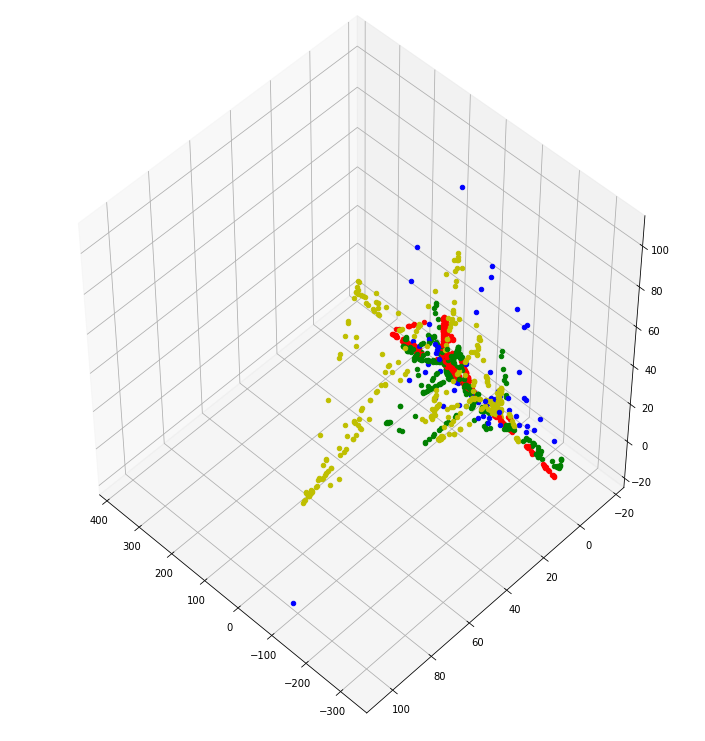

In [576]:
fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X_res_smoteenn)
X_pca = pca.transform(X_res_smoteenn)

for i in range(len(y_res_smoteenn)):
    if y_res_smoteenn[i]=='Left':
        ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='y')
    elif y_res_smoteenn[i]=='Right':
        ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='g')
    elif y_res_smoteenn[i]=='Bilateral':
        ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='b')
    else :
        ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='r')
plt.show()

In [604]:
sm = SMOTE(random_state=42, k_neighbors=3, m_neighbors='deprecated')
X_res_smote_gleason, y_res_smote_gleason = sm.fit_resample(X_new_gleason, y_gleason)
print('Resampled dataset shape %s' % Counter(y_res_smote_gleason))

Resampled dataset shape Counter({6: 246, 9: 246, 8: 246, 7: 246, 10: 246})


In [596]:
Counter(y_gleason)

Counter({6: 44, 9: 137, 8: 63, 7: 246, 10: 4})

In [597]:
from imblearn.over_sampling import SMOTE, ADASYN

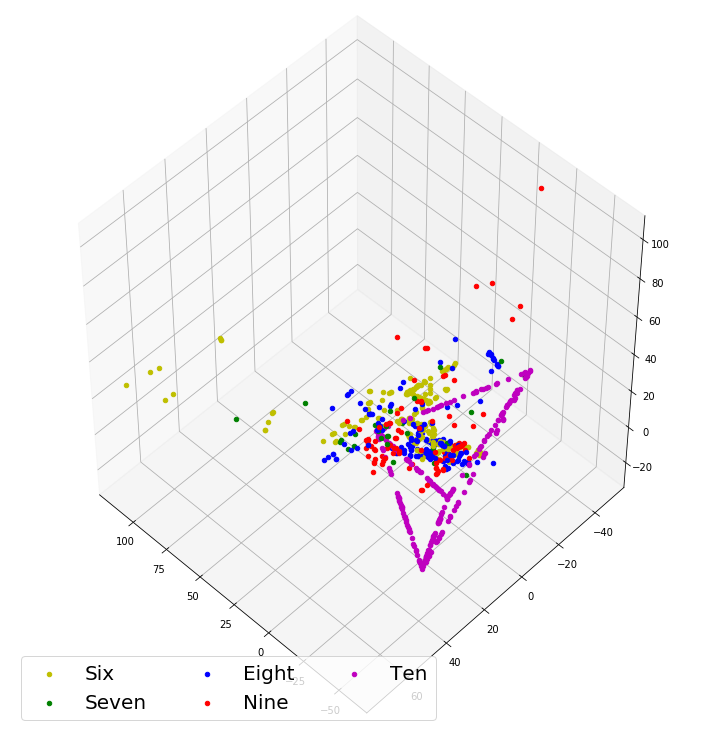

In [617]:
fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X_res_smoteenn_g)
X_pca = pca.transform(X_res_smoteenn_g)

for i in range(len(y_res_smoteenn_g)):
    if y_res_smoteenn_g[i]==6:
        six=ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2], c='y')
    elif y_res_smoteenn_g[i]==7:
        seven=ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2], c='g')
    elif y_res_smoteenn_g[i]==8:
        eight=ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2], c='b')
    elif y_res_smoteenn_g[i]==9:
        nine=ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2], c='r')
    elif y_res_smoteenn_g[i]==10:
        ten=ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2], c='m')
plt.legend((six,seven,eight,nine,ten),
           ('Six', 'Seven', 'Eight','Nine','Ten'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=20)
plt.show()

In [616]:
sme = SMOTEENN(random_state=42,smote=SMOTE(random_state=42, k_neighbors=3, m_neighbors='deprecated'))
X_res_smoteenn_g, y_res_smoteenn_g = sme.fit_resample(X_new_gleason, y_gleason)
print('Resampled dataset shape %s' % Counter(y_res_smoteenn_g))

Resampled dataset shape Counter({10: 246, 6: 222, 8: 199, 9: 103, 7: 27})


In [622]:
model = svm.SVC(kernel='rbf',gamma='auto')
scores=cross_val_score(model, X_res, y_res, scoring='accuracy', cv=10)
print("Accuracy scores for each fold are :" , scores)
print("Mean Accuracy score :" , scores.mean())

Accuracy scores for each fold are : [1.         0.98837209 0.99418605 0.99418605 0.98837209 0.99418605
 0.97674419 0.99418605 0.98837209 0.99418605]
Mean Accuracy score : 0.9912790697674418


In [94]:
clf = RandomForestClassifier(n_estimators=1)
clf = clf.fit(X.iloc[1:,1:], y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X.iloc[1:,1:])
X_new.shape   

(494, 36)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
classifier = KNeighborsClassifier(n_neighbors=1)

In [104]:
scores = cross_val_score(classifier, X_res_smote, y_res_smote, cv=10, scoring='accuracy')
print("Accuracy scores for each fold are :" , scores)
print("Mean Accuracy score :" , scores.mean())

Accuracy scores for each fold are : [0.81976744 0.8372093  0.81395349 0.80232558 0.81395349 0.75581395
 0.77325581 0.79069767 0.81976744 0.80232558]
Mean Accuracy score : 0.8029069767441861


Text(0,0.5,'Cross-validated accuracy')

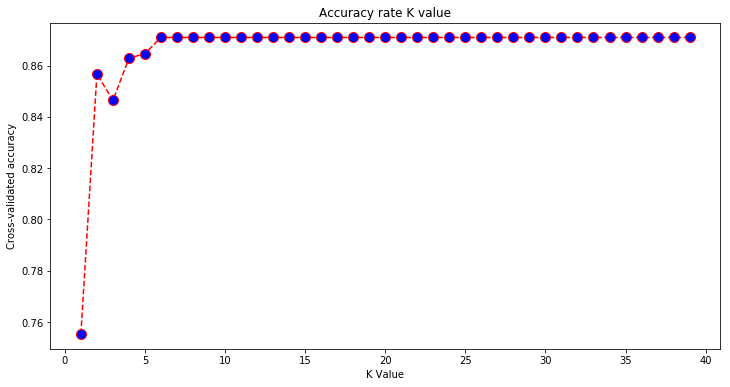

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy rate K value')  
plt.xlabel('K Value')  
plt.ylabel('Cross-validated accuracy')

In [83]:
model = svm.SVC(kernel='rbf',gamma='auto')
scores=cross_val_score(model, X.iloc[1:,1:], y_gleason, scoring='accuracy', cv=10)
print("Accuracy scores for each fold are :" , scores)
print("Mean Accuracy score :" , scores.mean())

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy scores for each fold are : [0.48076923 0.48076923 0.48076923 0.49019608 0.51020408 0.51020408
 0.5        0.5106383  0.5106383  0.5106383 ]
Mean Accuracy score : 0.4984826827621392


In [111]:
clf = RandomForestClassifier(n_estimators=1000)
#clf = clf.fit(X.iloc[1:,1:], y_gleason)

In [112]:
scores=cross_val_score(clf, X_res_smote, y_res_smote, scoring='accuracy', cv=10)
print("Accuracy scores for each fold are :" , scores)
print("Mean Accuracy score :" , scores.mean())

Accuracy scores for each fold are : [0.99418605 0.99418605 0.98837209 0.99418605 0.99418605 0.98255814
 0.98837209 0.98255814 0.99418605 0.99418605]
Mean Accuracy score : 0.9906976744186047


In [69]:
y_gleason=dataset2['GLEASON_SCORE']

In [74]:
scores = cross_val_score(classifier, X.iloc[1:,1:], y_gleason, cv=10, scoring='accuracy')
print("Accuracy scores for each fold are :" , scores)
print("Mean Accuracy score :" , scores.mean())

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy scores for each fold are : [0.48076923 0.51923077 0.57692308 0.43137255 0.51020408 0.6122449
 0.5625     0.5106383  0.5106383  0.55319149]
Mean Accuracy score : 0.5267712690640904


Text(0,0.5,'Cross-validated accuracy')

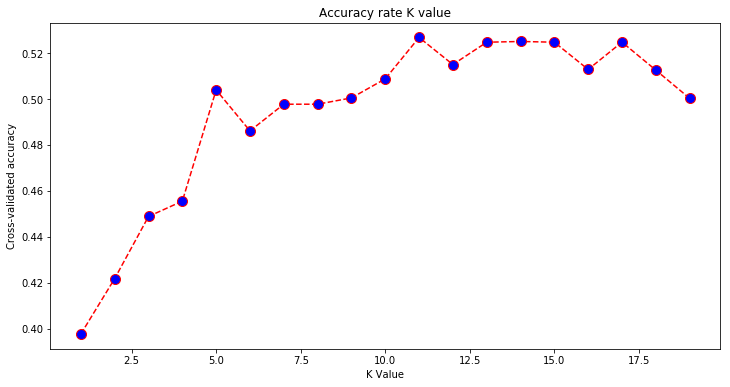

In [72]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy rate K value')  
plt.xlabel('K Value')  
plt.ylabel('Cross-validated accuracy') 

Text(0,0.5,'Cross-validated accuracy')

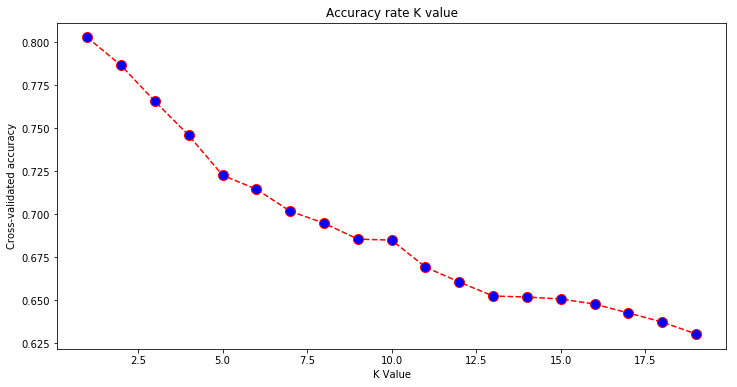

In [102]:
k_scores = []

# Calculating error for K values between 1 and 40
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_res_smote, y_res_smote, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy rate K value')  
plt.xlabel('K Value')  
plt.ylabel('Cross-validated accuracy') 

In [113]:
clf = RandomForestClassifier(n_estimators=1)
clf = clf.fit(X.iloc[1:,1:], y_gleason)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new_gleason = model.transform(X.iloc[1:,1:])
X_new_gleason.shape 

(494, 68)

In [114]:
sm = SMOTE(random_state=42, k_neighbors=3, m_neighbors='deprecated')
X_res_smote_gleason, y_res_smote_gleason = sm.fit_resample(X_new_gleason, y_gleason)
print('Resampled dataset shape %s' % Counter(y_res_smote_gleason))

Resampled dataset shape Counter({6: 246, 9: 246, 8: 246, 7: 246, 10: 246})


Text(0,0.5,'Cross-validated accuracy')

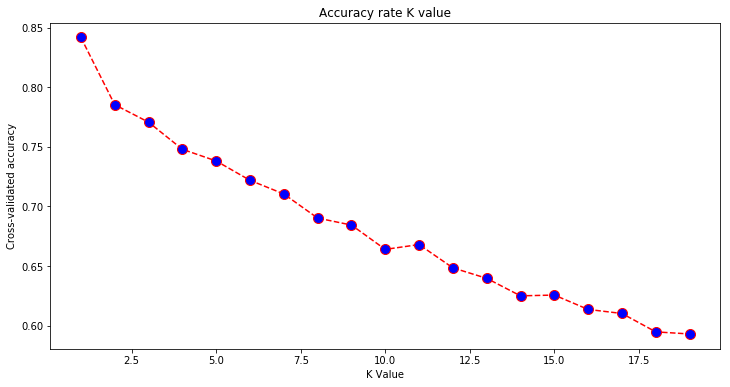

In [115]:
k_scores = []

# Calculating error for K values between 1 and 40
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_res_smote_gleason, y_res_smote_gleason, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy rate K value')  
plt.xlabel('K Value')  
plt.ylabel('Cross-validated accuracy') 

In [116]:
classifier = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(classifier, X_res_smote_gleason, y_res_smote_gleason, cv=10, scoring='accuracy')
print("Accuracy scores for each fold are :" , scores)
print("Mean Accuracy score :" , scores.mean())

Accuracy scores for each fold are : [0.752      0.808      0.84       0.84       0.824      0.888
 0.875      0.85       0.88333333 0.85833333]
Mean Accuracy score : 0.8418666666666667


In [117]:
model = svm.SVC(kernel='rbf',gamma='auto')
scores=cross_val_score(model, X_res_smote_gleason, y_res_smote_gleason, scoring='accuracy', cv=10)
print("Accuracy scores for each fold are :" , scores)
print("Mean Accuracy score :" , scores.mean())

Accuracy scores for each fold are : [0.616      0.744      0.664      0.736      0.728      0.76
 0.75833333 0.875      0.81666667 0.75      ]
Mean Accuracy score : 0.7447999999999999


In [121]:
clf = RandomForestClassifier(n_estimators=1000)
scores=cross_val_score(clf, X_res_smote_gleason, y_res_smote_gleason, scoring='accuracy', cv=10)
print("Accuracy scores for each fold are :" , scores)
print("Mean Accuracy score :" , scores.mean())

Accuracy scores for each fold are : [0.8        0.928      0.912      0.936      0.928      0.952
 0.94166667 0.9        0.9        0.85      ]
Mean Accuracy score : 0.9047666666666666


In [123]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=42)
X_res_smoteenn, y_res_smoteenn = sme.fit_resample(X_new, y)
print('Resampled dataset shape %s' % Counter(y_res_smoteenn))

Resampled dataset shape Counter({'Left': 342, 'Right': 312, '[Not Available]': 308, 'Bilateral': 73})


Text(0,0.5,'Cross-validated accuracy')

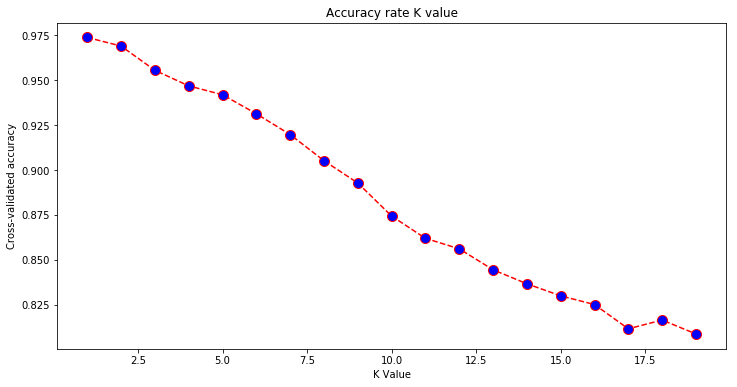

In [124]:
k_scores = []

# Calculating error for K values between 1 and 40
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_res_smoteenn, y_res_smoteenn, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy rate K value')  
plt.xlabel('K Value')  
plt.ylabel('Cross-validated accuracy')

In [125]:
classifier = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(classifier,  X_res_smoteenn, y_res_smoteenn, cv=10, scoring='accuracy')
print("Accuracy scores for each fold are :" , scores)
print("Mean Accuracy score :" , scores.mean())

Accuracy scores for each fold are : [0.99056604 0.99056604 0.99038462 0.98058252 0.98058252 0.9223301
 0.97087379 0.96116505 0.97058824 0.98039216]
Mean Accuracy score : 0.97380310635957


In [126]:
model = svm.SVC(kernel='rbf',gamma='auto')
scores=cross_val_score(model, X_res_smoteenn, y_res_smoteenn, scoring='accuracy', cv=10)
print("Accuracy scores for each fold are :" , scores)
print("Mean Accuracy score :" , scores.mean())

Accuracy scores for each fold are : [0.94339623 0.97169811 0.95192308 0.95145631 0.96116505 0.89320388
 0.93203883 0.9223301  0.93137255 0.96078431]
Mean Accuracy score : 0.9419368454048097


In [130]:
clf = RandomForestClassifier(n_estimators=1000)
scores=cross_val_score(clf, X_res_smoteenn, y_res_smoteenn, scoring='accuracy', cv=10)
print("Accuracy scores for each fold are :" , scores)
print("Mean Accuracy score :" , scores.mean())

Accuracy scores for each fold are : [0.96226415 0.97169811 0.96153846 0.94174757 0.96116505 0.94174757
 0.94174757 0.94174757 0.96078431 0.95098039]
Mean Accuracy score : 0.9535420771377584


In [131]:
sme = SMOTEENN(random_state=42,smote=SMOTE(random_state=42, k_neighbors=3, m_neighbors='deprecated'))
X_res_smoteenn_g, y_res_smoteenn_g = sme.fit_resample(X_new_gleason, y_gleason)
print('Resampled dataset shape %s' % Counter(y_res_smoteenn_g))

Resampled dataset shape Counter({10: 243, 6: 200, 8: 196, 9: 103, 7: 33})


Text(0,0.5,'Cross-validated accuracy')

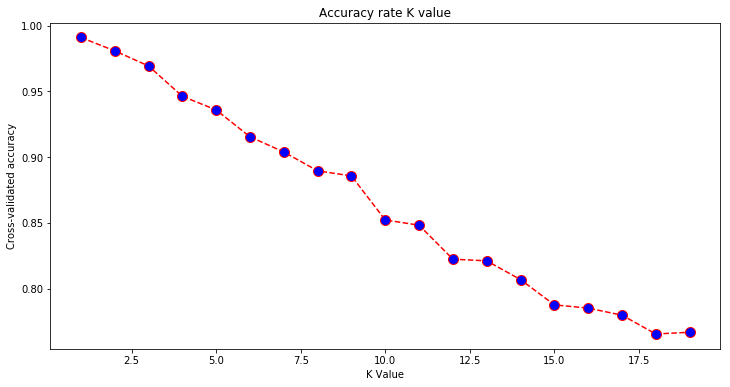

In [132]:
k_scores = []

# Calculating error for K values between 1 and 40
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_res_smoteenn_g, y_res_smoteenn_g, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy rate K value')  
plt.xlabel('K Value')  
plt.ylabel('Cross-validated accuracy')

In [134]:
classifier = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(classifier,  X_res_smoteenn_g, y_res_smoteenn_g, cv=10, scoring='accuracy')
print("Accuracy scores for each fold are :" , scores)
print("Mean Accuracy score :" , scores.mean())

Accuracy scores for each fold are : [0.9875     0.9875     1.         0.96103896 1.         0.98701299
 1.         0.98684211 1.         1.        ]
Mean Accuracy score : 0.9909894053315107


In [135]:
model = svm.SVC(kernel='rbf',gamma='auto')
scores=cross_val_score(model, X_res_smoteenn_g, y_res_smoteenn_g, scoring='accuracy', cv=10)
print("Accuracy scores for each fold are :" , scores)
print("Mean Accuracy score :" , scores.mean())

Accuracy scores for each fold are : [0.85       0.8125     0.9        0.84415584 0.80519481 0.90909091
 0.86842105 0.88157895 0.93421053 0.89473684]
Mean Accuracy score : 0.8699888926862611


In [139]:
clf = RandomForestClassifier(n_estimators=1000)
scores=cross_val_score(clf, X_res_smoteenn_g, y_res_smoteenn_g, scoring='accuracy', cv=10)
print("Accuracy scores for each fold are :" , scores)
print("Mean Accuracy score :" , scores.mean())

Accuracy scores for each fold are : [0.925      0.925      0.95       0.96103896 0.94805195 0.92207792
 0.94736842 0.94736842 0.96052632 0.97368421]
Mean Accuracy score : 0.9460116199589883


In [146]:
clf = RandomForestClassifier(n_estimators=1)
clf = clf.fit(X.iloc[1:,1:], y_gleason)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new_gleason = model.transform(X.iloc[1:,1:])
X_new_gleason.shape 

(494, 67)

In [147]:
# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    if(feature[1]!=0):
        print(feature)

('ENSG00000130649.8', 0.006172842472847224)
('ENSG00000255460.1', 0.003145775490970223)
('ENSG00000258690.1', 0.004194367321293631)
('ENSG00000280746.1', 0.006060728880925858)
('ENSG00000196954.11', 0.0060180052870734725)
('ENSG00000257504.1', 0.039958840283905776)
('ENSG00000221771.1', 0.01728513542275683)
('ENSG00000182473.19', 0.01172035211287536)
('ENSG00000237461.1', 0.012583101963880893)
('ENSG00000237349.1', 0.018538415650656923)
('ENSG00000280570.1', 0.012583101963880893)
('ENSG00000200448.1', 0.0062459600327959405)
('ENSG00000222548.2', 0.005778652804064865)
('ENSG00000200436.1', 0.027298587754256358)
('ENSG00000274752.1', 0.013023510532616727)
('ENSG00000259091.1', 0.015681607329057812)
('ENSG00000256835.1', 0.017386027043844354)
('ENSG00000261108.2', 0.008388734642587263)
('ENSG00000211672.2', 0.006291550981940446)
('ENSG00000124212.5', 0.012765465760458882)
('ENSG00000262333.1', 0.003145775490970223)
('ENSG00000212013.1', 0.01451896380447796)
('ENSG00000253821.1', 0.0047186

In [149]:
Counter(y_gleason)

Counter({6: 44, 9: 137, 8: 63, 7: 246, 10: 4})

In [151]:
X.iloc[:,1:].describe()

,1,2,3,4,5,6,7,8,9,10,...,60472,60474,60475,60476,60477,60478,60479,60480,60481,60482
count,495.0,495.000000,495.0,495.000000,495.000000,495.0,495.0,495.00000,495.0,495.0,...,495.000000,495.0,495.0,495.0,495.0,495.00000,495.000000,495.0,495.000000,495.0
unique,235.0,495.000000,4.0,495.000000,495.000000,18.0,490.0,495.00000,447.0,83.0,...,495.000000,473.0,11.0,422.0,307.0,495.00000,495.000000,9.0,495.000000,30.0
top,0.0,2.403959,0.0,1.711362,8.113421,0.0,0.0,112.26937,0.0,0.0,...,1.779339,0.0,0.0,0.0,0.0,9.16065,0.212236,0.0,0.138716,0.0
freq,261.0,1.000000,492.0,1.000000,1.000000,478.0,6.0,1.00000,49.0,413.0,...,1.000000,23.0,485.0,74.0,189.0,1.00000,1.000000,487.0,1.000000,466.0


Resampled dataset shape after running SMOTE algorithm for Data Oversampling Counter({6: 246, 9: 246, 8: 246, 7: 246, 10: 246})


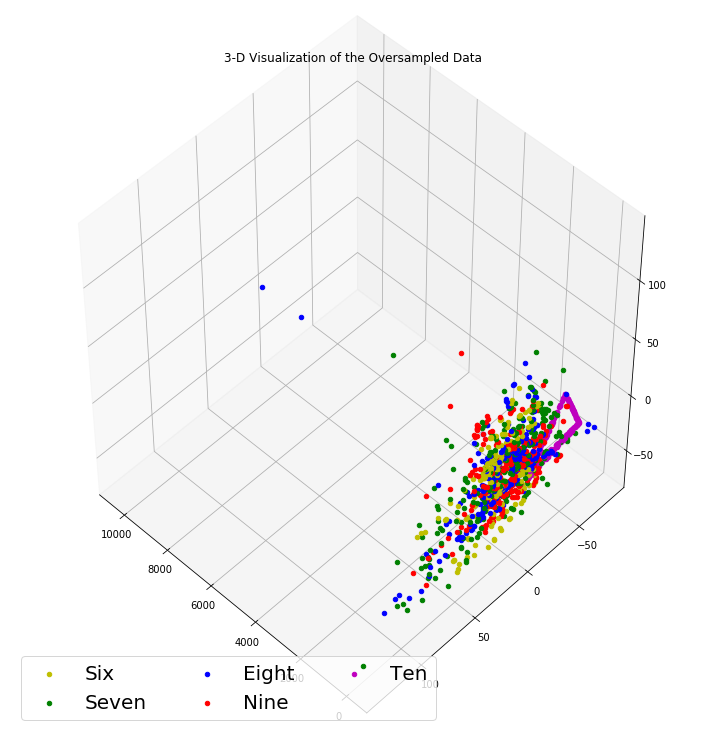

Resampled dataset shape after running SMOTEENN algorithm for combination of Data Oversampling and UndersamplingCounter({10: 246, 8: 207, 6: 204, 9: 100, 7: 36})


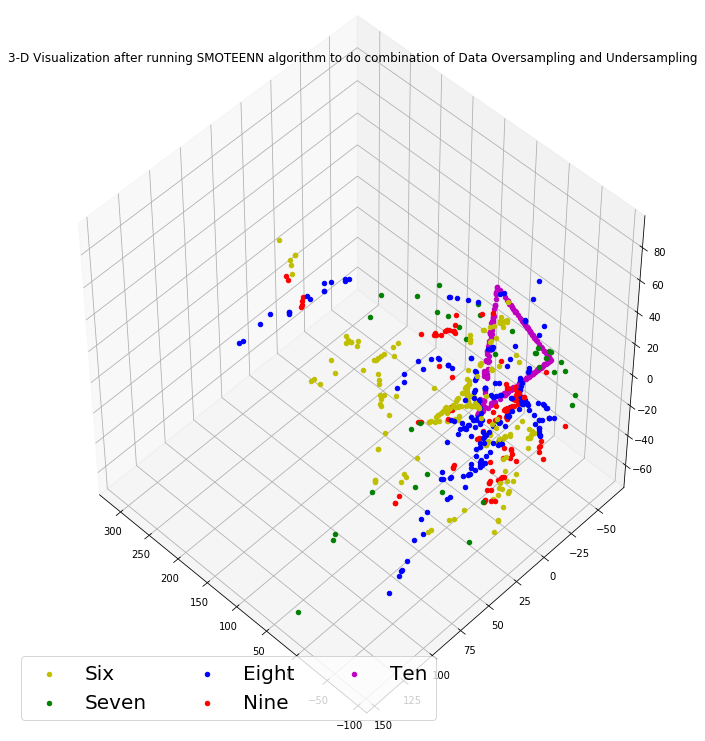

Accuracy scores for each fold for SVM-RBF algorithm after doing Data Oversampling using SMOTE algorithm are : [0.744      0.728      0.728      0.776      0.784      0.792
 0.775      0.86666667 0.84166667 0.85833333]
Mean Accuracy score : 0.7893666666666668
Accuracy scores for each fold for Random Forest algorithm after doing Data Oversampling using SMOTE algorithm are : [0.808      0.848      0.92       0.944      0.936      0.928
 0.94166667 0.91666667 0.88333333 0.875     ]
Mean Accuracy score : 0.9000666666666666
Accuracy scores for each fold for K-NN algorithm after doing Data Oversampling using SMOTE algorithmare : [0.792      0.832      0.792      0.776      0.856      0.856
 0.86666667 0.88333333 0.85       0.84166667]
Mean Accuracy score : 0.8345666666666667
Accuracy scores for each fold for SVM-RBF algorithm after doing Combination of Data Oversampling and Undersampling using SMOTEENN algorithm are : [0.86419753 0.87654321 0.86419753 0.83950617 0.8875     0.875
 0.93589744 0

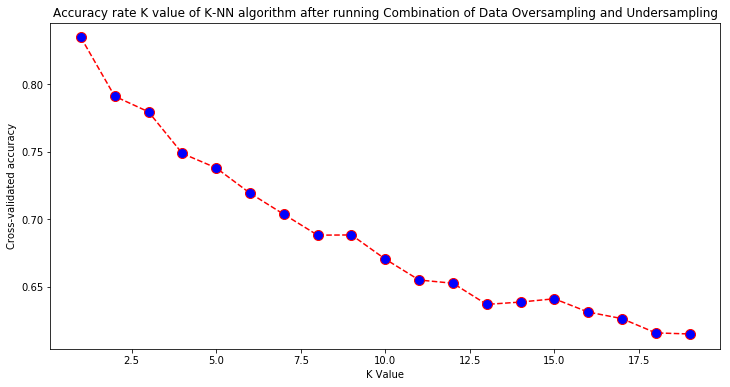

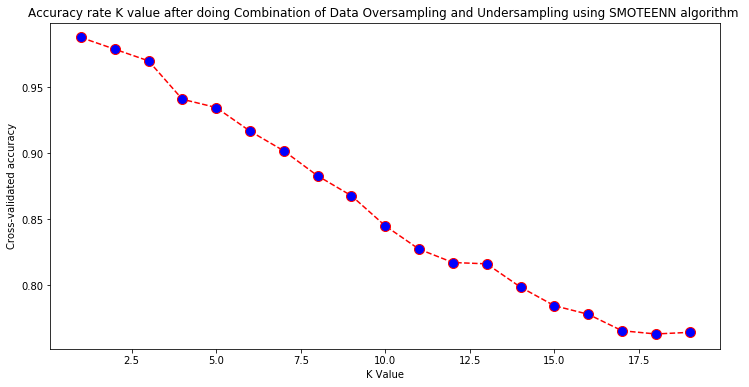

In [159]:
#Code to Over Sample the data using SMOTE algorithm
sm = SMOTE(random_state=42,k_neighbors=3, m_neighbors='deprecated')
X_res, y_res = sm.fit_resample(X_new_gleason, y_gleason)
print('Resampled dataset shape after running SMOTE algorithm for Data Oversampling %s' % Counter(y_res))

#Code to Over Sample the data using Random Sampler algorithm
#ros = RandomOverSampler(random_state=42)
#X_res, y_res = ros.fit_resample(X_new, y)
#print('Resampled dataset shape %s' % Counter(y_res))
#X_res.shape
#y_res.shape
#code to plot 3-D graph using PCA after doing over sampling
fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X_res)
X_pca = pca.transform(X_res)

for i in range(len(y_res)):
    if y_res[i]==6:
        six=ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2], c='y',label=y_res[i])
    elif y_res[i]==7:
        seven=ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2], c='g',label=y_res[i])
    elif y_res[i]==8:
        eight=ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2], c='b',label=y_res[i])
    elif y_res[i]==9:
        nine=ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2], c='r',label=y_res[i])
    elif y_res[i]==10:
        ten=ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2], c='m',label=y_res[i])
plt.legend((six,seven,eight,nine,ten),
           ('Six', 'Seven', 'Eight','Nine','Ten'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=20)
plt.title('3-D Visualization of the Oversampled Data')
plt.show()

#code to perform combination of over and under sampling using SMOTEENN
sme = SMOTEENN(random_state=42,smote=SMOTE(random_state=42, k_neighbors=3, m_neighbors='deprecated'))
X_res_smoteenn, y_res_smoteenn = sme.fit_resample(X_new_gleason, y_gleason)
print('Resampled dataset shape after running SMOTEENN algorithm for combination of Data Oversampling and Undersampling%s' % Counter(y_res_smoteenn))

#code to plot 3-D graph using PCA after doing over sampling and under sampling using SMOTEENN
fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X_res_smoteenn)
X_pca = pca.transform(X_res_smoteenn)

for i in range(len(y_res_smoteenn)):
    if y_res_smoteenn[i]==6:
        six=ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2], c='y',label=y_res_smoteenn[i])
    elif y_res_smoteenn[i]==7:
        seven=ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2], c='g',label=y_res_smoteenn[i])
    elif y_res_smoteenn[i]==8:
        eight=ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2], c='b',label=y_res_smoteenn[i])
    elif y_res_smoteenn[i]==9:
        nine=ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2], c='r',label=y_res_smoteenn[i])
    elif y_res_smoteenn[i]==10:
        ten=ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2], c='m',label=y_res_smoteenn[i])
plt.legend((six,seven,eight,nine,ten),
           ('Six', 'Seven', 'Eight','Nine','Ten'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=20)
plt.title('3-D Visualization after running SMOTEENN algorithm to do combination of Data Oversampling and Undersampling')
plt.show()

#code to perform classification of over sampled data using SMOTE

#SVM-RBF 10 fold cross validation classification
model = svm.SVC(kernel='rbf',gamma='auto')
scores=cross_val_score(model, X_res, y_res, scoring='accuracy', cv=10)
print("Accuracy scores for each fold for SVM-RBF algorithm after doing Data Oversampling using SMOTE algorithm are :" , scores)
print("Mean Accuracy score :" , scores.mean())

#Random Forest Classifier 10 fold cross validation classification
model = RandomForestClassifier(n_estimators=1000)
scores=cross_val_score(model, X_res, y_res, scoring='accuracy', cv=10)
print("Accuracy scores for each fold for Random Forest algorithm after doing Data Oversampling using SMOTE algorithm are :" , scores)
print("Mean Accuracy score :" , scores.mean())

#KNN 10 fold classification
k_scores = []

# Calculating best values for K values between 1 and 20
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_res, y_res, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy rate K value of K-NN algorithm after running Combination of Data Oversampling and Undersampling')  
plt.xlabel('K Value')  
plt.ylabel('Cross-validated accuracy') 

#we found best alue of K = 1 so we used that for Classification
classifier = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(classifier, X_res, y_res, cv=10, scoring='accuracy')
print("Accuracy scores for each fold for K-NN algorithm after doing Data Oversampling using SMOTE algorithmare :" , scores)
print("Mean Accuracy score :" , scores.mean())

#code to perform classification of over sampled data using SMOTEENN

#SVM-RBF 10 fold cross validation classification
model = svm.SVC(kernel='rbf',gamma='auto')
scores=cross_val_score(model, X_res_smoteenn, y_res_smoteenn, scoring='accuracy', cv=10)
print("Accuracy scores for each fold for SVM-RBF algorithm after doing Combination of Data Oversampling and Undersampling using SMOTEENN algorithm are :" , scores)
print("Mean Accuracy score :" , scores.mean())

#Random Forest Classifier 10 fold cross validation classification
model = RandomForestClassifier(n_estimators=1000)
scores=cross_val_score(model, X_res_smoteenn, y_res_smoteenn, scoring='accuracy', cv=10)
print("Accuracy scores for each fold for Random Forest algorithm after doing Combination of Data Oversampling and Undersampling using SMOTEENN algorithm are :" , scores)
print("Mean Accuracy score :" , scores.mean())

#KNN 10 fold classification
k_scores = []

# Calculating best values for K values between 1 and 40
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_res_smoteenn, y_res_smoteenn, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy rate K value after doing Combination of Data Oversampling and Undersampling using SMOTEENN algorithm ')  
plt.xlabel('K Value')  
plt.ylabel('Cross-validated accuracy') 

#we found best value of K = 1 so we used that for Classification
classifier = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(classifier, X_res_smoteenn, y_res_smoteenn, cv=10, scoring='accuracy')
print("Accuracy scores for each fold for K-NN algorithm after doing Combination of Data Oversampling and Undersampling using SMOTEENN algorithm are :" , scores)
print("Mean Accuracy score :" , scores.mean())

#Code to give list of features
feat_labels=X.iloc[0]
# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    if(feature[1]!=0):
        print(feature)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 8 members, which is too few. The minimum number 

Accuracy scores for each fold for K-NN algorithm on original data are : [0.86       0.86       0.86       0.86       0.86       0.86
 0.86       0.86       0.91489362 0.91489362]
Mean Accuracy score : 0.8709787234042553


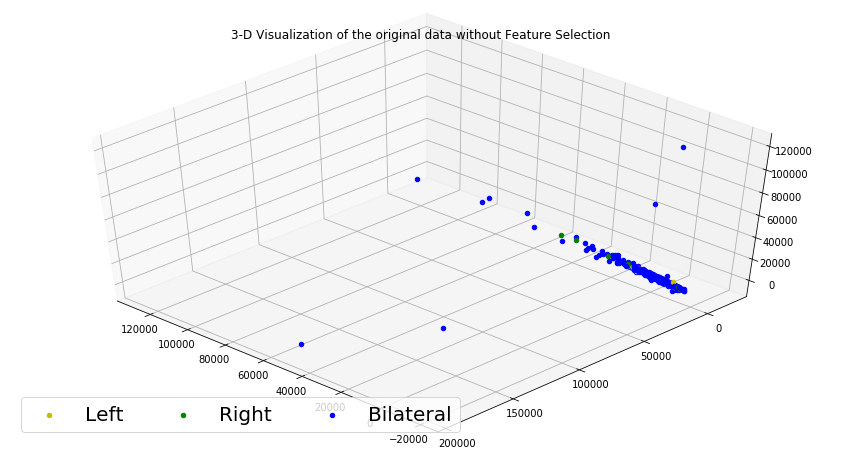

Resampled dataset shape after running SMOTE algorithm for Data Oversampling Counter({'Bilateral': 430, 'Right': 430, 'Left': 430, '[Not Available]': 430})


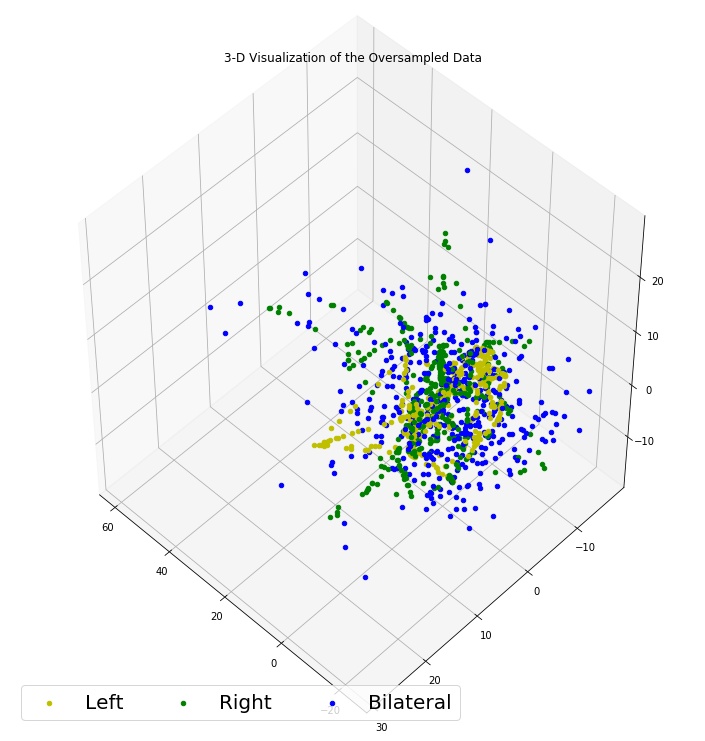

Resampled dataset shape after running SMOTEENN algorithm for combination of Data Oversampling and Undersampling Counter({'[Not Available]': 420, 'Left': 397, 'Right': 382, 'Bilateral': 162})


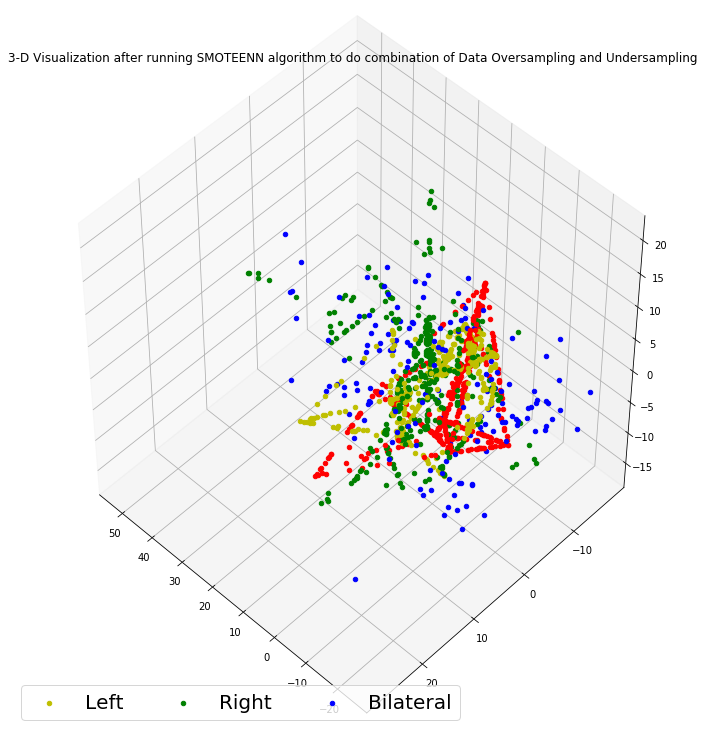

Accuracy scores for each fold for SVM-RBF algorithm after doing Data Oversampling using SMOTE algorithm are : [0.96511628 0.94767442 0.93023256 0.96511628 0.94767442 0.93604651
 0.93604651 0.91860465 0.94767442 0.95930233]
Mean Accuracy score : 0.9453488372093023
Accuracy scores for each fold for Random Forest algorithm after doing Data Oversampling using SMOTE algorithm are : [0.98837209 0.99418605 1.         1.         0.99418605 0.98255814
 0.98837209 0.98255814 0.99418605 0.99418605]
Mean Accuracy score : 0.991860465116279
Accuracy scores for each fold for K-NN algorithm after doing Data Oversampling using SMOTE algorithmare : [0.94186047 0.90116279 0.90116279 0.9244186  0.88953488 0.86627907
 0.87209302 0.89534884 0.87790698 0.93604651]
Mean Accuracy score : 0.9005813953488373
Accuracy scores for each fold for SVM-RBF algorithm after doing Combination of Data Oversampling and Undersampling using SMOTEENN algorithm are : [0.99275362 1.         0.98529412 1.         0.99264706 0.985

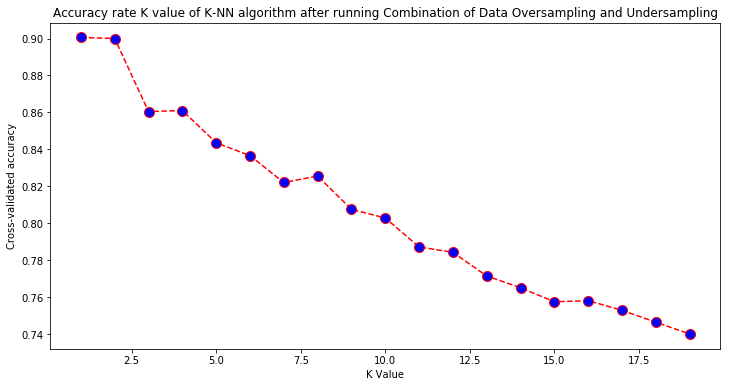

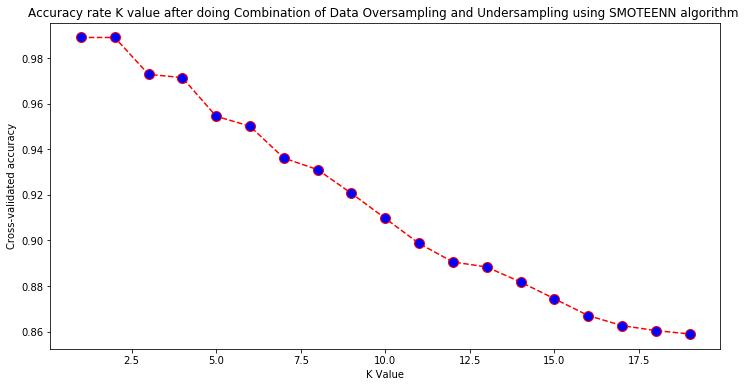

In [161]:
#KNN 10 fold classification
k_scores = []

# Calculating best values for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X.iloc[1:,1:], y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy rate K value after running K-NN algorithm on the original Data')
plt.xlabel('K Value')  
plt.ylabel('Cross-validated accuracy') 

#we found best alue of K = 6 so we used that for Classification
classifier = KNeighborsClassifier(n_neighbors=6)
scores = cross_val_score(classifier, X.iloc[1:,1:], y, cv=10, scoring='accuracy')
print("Accuracy scores for each fold for K-NN algorithm on original data are :" , scores)
print("Mean Accuracy score :" , scores.mean())

#code to plot 3-D graph using PCA on the orignal dataset
fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X.iloc[1:,1:])
X_pca = pca.transform(X.iloc[1:,1:])

for i in range(len(y)):
    if y[i]=='Left':
        left=ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='y')
    elif y[i]=='Right':
        right=ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='g')
    elif y[i]=='Bilateral':
        bilateral=ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='b')
plt.legend((left,right,bilateral),
           ('Left', 'Right', 'Bilateral'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=20)
plt.title('3-D Visualization of the original data without Feature Selection')
plt.show()


#code to perform feature selection

clf = RandomForestClassifier(n_estimators=1)
clf = clf.fit(X.iloc[1:,1:], y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X.iloc[1:,1:])
X_new.shape

#Code to Over Sample the data using SMOTE algorithm
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_new, y)
print('Resampled dataset shape after running SMOTE algorithm for Data Oversampling %s' % Counter(y_res))

#Code to Over Sample the data using Random Sampler algorithm
#ros = RandomOverSampler(random_state=42)
#X_res, y_res = ros.fit_resample(X_new, y)
#print('Resampled dataset shape %s' % Counter(y_res))
#X_res.shape
#y_res.shape
#code to plot 3-D graph using PCA after doing over sampling
fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X_res)
X_pca = pca.transform(X_res)

for i in range(len(y_res)):
    if y_res[i]=='Left':
        ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='y')
    elif y_res[i]=='Right':
        ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='g')
    elif y_res[i]=='Bilateral':
        ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='b')
plt.legend((left,right,bilateral),
           ('Left', 'Right', 'Bilateral'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=20)
plt.title('3-D Visualization of the Oversampled Data')
plt.show()

#code to perform combination of over and under sampling using SMOTEENN
sme = SMOTEENN(random_state=42)
X_res_smoteenn, y_res_smoteenn = sme.fit_resample(X_new, y)
print('Resampled dataset shape after running SMOTEENN algorithm for combination of Data Oversampling and Undersampling %s' % Counter(y_res_smoteenn))

#code to plot 3-D graph using PCA after doing over sampling and under sampling using SMOTEEN
fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X_res_smoteenn)
X_pca = pca.transform(X_res_smoteenn)

for i in range(len(y_res_smoteenn)):
    if y_res_smoteenn[i]=='Left':
        ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='y')
    elif y_res_smoteenn[i]=='Right':
        ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='g')
    elif y_res_smoteenn[i]=='Bilateral':
        ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='b')
    else :
        ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='r')
plt.legend((left,right,bilateral),
           ('Left', 'Right', 'Bilateral'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=20)
plt.title('3-D Visualization after running SMOTEENN algorithm to do combination of Data Oversampling and Undersampling')
plt.show()

#code to perform classification of over sampled data using SMOTE

#SVM-RBF 10 fold cross validation classification
model = svm.SVC(kernel='rbf',gamma='auto')
scores=cross_val_score(model, X_res, y_res, scoring='accuracy', cv=10)
print("Accuracy scores for each fold for SVM-RBF algorithm after doing Data Oversampling using SMOTE algorithm are :" , scores)
print("Mean Accuracy score :" , scores.mean())

#Random Forest Classifier 10 fold cross validation classification
model = RandomForestClassifier(n_estimators=1000)
scores=cross_val_score(model, X_res, y_res, scoring='accuracy', cv=10)
print("Accuracy scores for each fold for Random Forest algorithm after doing Data Oversampling using SMOTE algorithm are :" , scores)
print("Mean Accuracy score :" , scores.mean())

#KNN 10 fold classification
k_scores = []

# Calculating best values for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_res, y_res, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy rate K value of K-NN algorithm after doing Data Oversampling using SMOTE algorithm')
plt.xlabel('K Value')  
plt.ylabel('Cross-validated accuracy') 

#we found best alue of K = 1 so we used that for Classification
classifier = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(classifier, X_res, y_res, cv=10, scoring='accuracy')
print("Accuracy scores for each fold for K-NN algorithm after doing Data Oversampling using SMOTE algorithm are :" , scores)
print("Mean Accuracy score :" , scores.mean())

#code to perform classification of over sampled data using SMOTEENN

#SVM-RBF 10 fold cross validation classification
model = svm.SVC(kernel='rbf',gamma='auto')
scores=cross_val_score(model, X_res_smoteenn, y_res_smoteenn, scoring='accuracy', cv=10)
print("Accuracy scores for each fold for SVM-RBF algorithm after doing Combination of Data Oversampling and Undersampling using SMOTEENN algorithm are :" , scores)
print("Mean Accuracy score :" , scores.mean())

#Random Forest Classifier 10 fold cross validation classification
model = RandomForestClassifier(n_estimators=1000)
scores=cross_val_score(model, X_res_smoteenn, y_res_smoteenn, scoring='accuracy', cv=10)
print("Accuracy scores for each fold for Random Forest algorithm after doing Combination of Data Oversampling and Undersampling using SMOTEENN algorithm are :" , scores)
print("Mean Accuracy score :" , scores.mean())

#KNN 10 fold classification
k_scores = []

# Calculating best values for K values between 1 and 40
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_res_smoteenn, y_res_smoteenn, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy rate K value after doing Combination of Data Oversampling and Undersampling using SMOTEENN algorithm ')
plt.xlabel('K Value')  
plt.ylabel('Cross-validated accuracy') 

#we found best value of K = 1 so we used that for Classification
classifier = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(classifier, X_res_smoteenn, y_res_smoteenn, cv=10, scoring='accuracy')
print("Accuracy scores for each fold for K-NN algorithm after doing Combination of Data Oversampling and Undersampling using SMOTEENN algorithm are :" , scores)
print("Mean Accuracy score :" , scores.mean())

#Code to give list of features
feat_labels=X.iloc[0]
# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    if(feature[1]!=0):
        print(feature)
